In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

## Network Centrality

Centrality measures identify the most important nodes in a network:
* Influential nodes in a social network
* Nodes that disseminate information to many nodes or prevent epidemics
* Hubs in a transportation network
* Important pages on the Web
* Nodes that prevent the network from breaking up

### Centrality Measures
* Degree centrality
* Closeness centrality

**Degree Centrality**

Assumption: important nodes have many connections

The most basic measure of centrality: number of neighbors

Undirected networks: use degree

Directed networks: use in-degree or out-degree

$C_{deg}(v) = ^{d_{v}}/_{|N|-1}$, where $N$ is the set of nodes in the network and  $d_v$ is the degree of node $v$

In [3]:
G = nx.karate_club_graph()

In [4]:
nx.convert_node_labels_to_integers(G, first_label=1)
deg_cent = nx.degree_centrality(G)
deg_cent[33]

0.5151515151515151

**Degree Centrality - Directed Networks**

$C_{indeg}(v) = ^{d_v^{in}}/_{|N|-1}$ where 

$N$ = set of nodes in the network

$d_v^{in}$ = the in-degree of node $v$

$C_{outdeg}(v) = ^{d_v^{out}}/_{|N|-1}$ where 

$N$ = set of nodes in the network

$d_v^{out}$ = the out-degree of node $v$

**Closeness Centrality**

Assumption: important nodes are close to other nodes

$C_{close}(v) = ^{|N|-1}/_{\sum_{u \in N\{v\}}d(v,u)}$ where

$N$ = set of nodes in the network

$d(v,u)$ = length of shortest path from $v$ to $u$

In [5]:
close_cent = nx.closeness_centrality(G)
close_cent[32]

0.515625

In [6]:
sum(nx.shortest_path_length(G,32).values())

64

How to measure the closeness centrality of a node when it cannot reach all other nodes?

**Option I**: consider only nodes that L can reach

**Option II**: consider only nodes that L can reach and normalize by the fraction of nodes L can reach

**Betweenness Centrality**

Assumption: important nodes connect other nodes

Recall: the distance between two nodes is the length of the shortest path between them

In [7]:
E = nx.Graph()

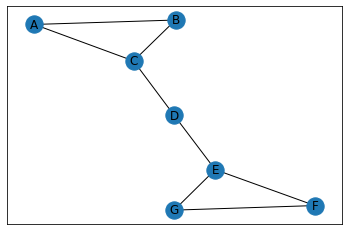

In [8]:
E.add_edges_from([('A','B'),('A','C'),('B','C'),('C','D'),('D','E'),
                  ('E','F'),('E','G'),('F','G')])
plot_graph(E)

In [1]:
import networkx as nx

from bokeh.io import output_notebook, show
from bokeh.plotting import figure, from_networkx

G = nx.karate_club_graph()

plot = figure(title="Networkx Integration Demonstration", x_range=(-1.1,1.1), y_range=(-1.1,1.1))

graph = from_networkx(G, nx.spring_layout, scale=2, center=(0,0))
plot.renderers.append(graph)

output_notebook()
show(plot)


Loading BokehJS ...

In [10]:
nx.betweenness_centrality(E, endpoints=False, normalized=False)

{'A': 0.0, 'B': 0.0, 'C': 8.0, 'D': 9.0, 'E': 8.0, 'F': 0.0, 'G': 0.0}

In [11]:
nx.betweenness_centrality(E, endpoints=False)

{'A': 0.0,
 'B': 0.0,
 'C': 0.5333333333333333,
 'D': 0.6,
 'E': 0.5333333333333333,
 'F': 0.0,
 'G': 0.0}

In [12]:
approx_between= nx.betweenness_centrality(E, endpoints=False, normalized=True, k =2)
approx_between

{'A': 0.0,
 'B': 0.0,
 'C': 0.23333333333333334,
 'D': 0.7,
 'E': 0.7,
 'F': 0.0,
 'G': 0.0}

In [13]:
nx.pagerank(G)

{0: 0.09700181758983709,
 1: 0.05287839103742701,
 2: 0.057078423047636745,
 3: 0.03586064322306479,
 4: 0.021979406974834498,
 5: 0.02911334166344221,
 6: 0.02911334166344221,
 7: 0.024490758039509182,
 8: 0.029765339186167028,
 9: 0.014308950284462801,
 10: 0.021979406974834498,
 11: 0.009564916863537148,
 12: 0.014645186487916191,
 13: 0.029536314977202986,
 14: 0.014535161524273825,
 15: 0.014535161524273825,
 16: 0.016785378110253487,
 17: 0.014558859774243493,
 18: 0.014535161524273825,
 19: 0.019604416711937293,
 20: 0.014535161524273825,
 21: 0.014558859774243493,
 22: 0.014535161524273825,
 23: 0.03152091531163228,
 24: 0.021075455001162945,
 25: 0.021005628174745786,
 26: 0.015043395360629753,
 27: 0.025638803528350497,
 28: 0.01957296050943854,
 29: 0.02628726283711208,
 30: 0.02458933653429248,
 31: 0.03715663592267942,
 32: 0.07169213006588289,
 33: 0.1009179167487121}

## Week 3 Quiz

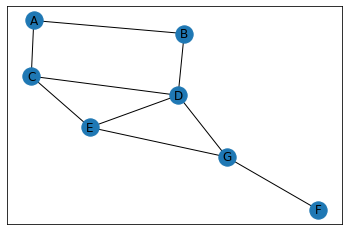

In [15]:
E = nx.Graph()
E.add_edges_from([('A', 'B'),('A', 'C'),('B', 'D'),('C', 'D'),('C', 'E'),('D', 'E'),('D', 'G'),
                  ('E', 'G'),('G', 'F')])
plot_graph(E)

In [16]:
nx.degree_centrality(E)

{'A': 0.3333333333333333,
 'B': 0.3333333333333333,
 'C': 0.5,
 'D': 0.6666666666666666,
 'E': 0.5,
 'G': 0.5,
 'F': 0.16666666666666666}

In [17]:
nx.closeness_centrality(E)

{'A': 0.46153846153846156,
 'B': 0.5454545454545454,
 'C': 0.6,
 'D': 0.75,
 'E': 0.6666666666666666,
 'G': 0.6,
 'F': 0.4}

In [18]:
nx.betweenness_centrality(E, endpoints=False, normalized=True)

{'A': 0.03333333333333333,
 'B': 0.07777777777777777,
 'C': 0.18888888888888888,
 'D': 0.38888888888888884,
 'E': 0.1111111111111111,
 'G': 0.3333333333333333,
 'F': 0.0}

In [22]:
nx.edge_betweenness_centrality(E, normalized=False)

{('A', 'B'): 2.666666666666666,
 ('A', 'C'): 4.333333333333333,
 ('B', 'D'): 5.666666666666667,
 ('C', 'D'): 3.666666666666666,
 ('C', 'E'): 3.666666666666666,
 ('D', 'E'): 2.0,
 ('D', 'G'): 6.333333333333333,
 ('E', 'G'): 3.6666666666666665,
 ('G', 'F'): 6.0}